In [4]:
import pandas as pd
import csv
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# import and clean county data from wikipedia

countypath = "./countydata.csv"
rawdata = []
with open(countypath, "r") as file:
    csvreader = csv.reader(file)
    
    next(csvreader)

    for row in csvreader:
        if row[0].startswith("("):
            continue

        rawdata.append([row[0],row[3],row[-1]])

        
# with open("./extracted_county_data.csv","w") as file:
#     writer = csv.writer(file)    
#     for row in rawdata:
#         writer.writerow(row)

In [6]:
# further cleaning of extracted county data

countystats_df = pd.read_csv("./extracted_county_data.csv")
countystats_df.head()

,County,Origin,Map
0,Anderson County,1846,"1,071 sq mi"
1,Andrews County,1876,"1,501 sq mi"
2,Angelina County,1846,802 sq mi
3,Aransas County,1871,252 sq mi
4,Archer County,1858,910 sq mi


In [7]:
countystats_df.isnull().sum()

County    0
Origin    0
Map       0
dtype: int64

In [8]:
countystats_df[countystats_df["Map"].isnull()==True]

,County,Origin,Map


In [9]:
countystats_df.isna().sum()

County    0
Origin    0
Map       0
dtype: int64

In [10]:
def area_clean(row):
    try:
        return int(row.split(" ")[0].replace(",",""))
    except:
        print(row)

In [11]:
countystats_df["Map"] = countystats_df["Map"].apply(area_clean)

In [12]:
countystats_df["County"]=countystats_df["County"].apply(lambda row : row.split(" ")[0] )

In [13]:
countystats_df.head()

,County,Origin,Map
0,Anderson,1846,1071
1,Andrews,1876,1501
2,Angelina,1846,802
3,Aransas,1871,252
4,Archer,1858,910


# working with case data

In [14]:
texascases = pd.read_csv("texascases.csv")

In [15]:
texascases.head()

,County Name,Population,Cases \n03-04,Cases \n03-05,Cases \n03-06,Cases \n03-09,Cases \n03-10,Cases \n03-11,Cases \n03-12,Cases \n03-13,...,Cases \n04-16,Cases \n04-17,Cases \n04-18,Cases \n04-19,Cases \n04-20,Cases \n04-21,Cases \n04-22,Cases \n04-23,Cases \n04-24,Cases \n04-25
0,Anderson,"62,245",0,0,0,0,0,0,0,0,...,6,6,6,8,8,10,14,14,16,16
1,Andrews,"17,487",0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
2,Angelina,"94,245",0,0,0,0,0,0,0,0,...,20,23,23,23,23,27,30,31,33,36
3,Aransas,"26,041",0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
4,Archer,"9,847",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df = pd.concat([countystats_df,texascases], axis="columns", join="inner")
df.drop(columns="County", inplace=True)
df["Population"]=df["Population"].str.replace(",","").astype(int)

In [17]:

df.set_index("County Name",inplace=True)
df.head()

,Origin,Map,Population,Cases \n03-04,Cases \n03-05,Cases \n03-06,Cases \n03-09,Cases \n03-10,Cases \n03-11,Cases \n03-12,...,Cases \n04-16,Cases \n04-17,Cases \n04-18,Cases \n04-19,Cases \n04-20,Cases \n04-21,Cases \n04-22,Cases \n04-23,Cases \n04-24,Cases \n04-25
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,1846,1071,62245,0,0,0,0,0,0,0,...,6,6,6,8,8,10,14,14,16,16
Andrews,1876,1501,17487,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
Angelina,1846,802,94245,0,0,0,0,0,0,0,...,20,23,23,23,23,27,30,31,33,36
Aransas,1871,252,26041,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Archer,1858,910,9847,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
comment_df = df.loc[["Fort Bend","Harris","Dallas","Bexar","Travis"]][["Map","Population","Cases \n04-22"]]
comment_df

,Map,Population,Cases \n04-22
County Name,,,
Fort Bend,875,888595,808
Harris,1729,4885616,5143
Dallas,888,2639966,2602
Bexar,1247,2062088,1080
Travis,989,1277007,1233


In [19]:
comment_df["rate"] = comment_df["Cases \n04-22"]/comment_df["Population"]
comment_df

,Map,Population,Cases \n04-22,rate
County Name,,,,
Fort Bend,875,888595,808,0.000909
Harris,1729,4885616,5143,0.001053
Dallas,888,2639966,2602,0.000986
Bexar,1247,2062088,1080,0.000524
Travis,989,1277007,1233,0.000966


In [20]:
comment_df["Density"] = comment_df["Population"]/comment_df["Map"]

In [21]:
comment_df.to_markdown()

'| County Name   |   Map |       Population |   Cases  |        rate |   Density |\n|               |       |                  |    04-22 |             |           |\n|:--------------|------:|-----------------:|---------:|------------:|----------:|\n| Fort Bend     |   875 | 888595           |      808 | 0.000909301 |   1015.54 |\n| Harris        |  1729 |      4.88562e+06 |     5143 | 0.00105268  |   2825.69 |\n| Dallas        |   888 |      2.63997e+06 |     2602 | 0.000985619 |   2972.93 |\n| Bexar         |  1247 |      2.06209e+06 |     1080 | 0.000523741 |   1653.64 |\n| Travis        |   989 |      1.27701e+06 |     1233 | 0.000965539 |   1291.21 |'

## comparison across all counties

In [22]:
df[["Map","Population","Cases \n04-22"]]
df["Density"] = df["Population"]/df["Map"]
df["Rate"] = df["Cases \n04-22"]/df["Population"]
df.head()

,Origin,Map,Population,Cases \n03-04,Cases \n03-05,Cases \n03-06,Cases \n03-09,Cases \n03-10,Cases \n03-11,Cases \n03-12,...,Cases \n04-18,Cases \n04-19,Cases \n04-20,Cases \n04-21,Cases \n04-22,Cases \n04-23,Cases \n04-24,Cases \n04-25,Density,Rate
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,1846,1071,62245,0,0,0,0,0,0,0,...,6,8,8,10,14,14,16,16,58.118581,0.000225
Andrews,1876,1501,17487,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,11.650233,0.001087
Angelina,1846,802,94245,0,0,0,0,0,0,0,...,23,23,23,27,30,31,33,36,117.512469,0.000318
Aransas,1871,252,26041,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,103.337302,0.000077
Archer,1858,910,9847,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10.820879,0.000000


In [23]:
no_cases = df[["Population","Map","Density","Rate"]]

In [24]:
no_cases.sort_values("Rate", ascending=False).head(20)

,Population,Map,Density,Rate
County Name,,,,
Moore,25817,900,28.685556,0.006275
Donley,3873,930,4.164516,0.006197
Sherman,3440,923,3.726977,0.002616
Shelby,28649,794,36.081864,0.002408
Roberts,994,924,1.075758,0.002012
Panola,25965,801,32.415730,0.001887
Washington,37673,609,61.860427,0.001885
San Augustine,9340,528,17.689394,0.001499
Lubbock,313938,900,348.820000,0.001459


In [25]:
no_cases.sort_values("Density", ascending=False).head(20)

,Population,Map,Density,Rate
County Name,,,,
Dallas,2639966,888,2972.934685,0.000986
Harris,4885616,1729,2825.688837,0.001053
Tarrant,2127850,864,2462.789352,0.000626
Bexar,2062088,1247,1653.639134,0.000524
Collin,1150398,848,1356.601415,0.000495
Travis,1277007,989,1291.210313,0.000966
Denton,943020,888,1061.959459,0.000656
Fort Bend,888595,875,1015.537143,0.000909
El Paso,952366,1013,940.144126,0.000616


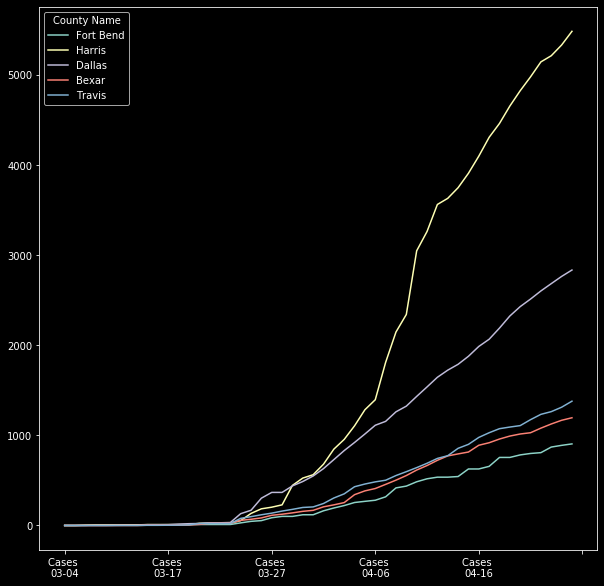

In [26]:
df[[col for col in df if col.startswith("Cases")]].loc[["Fort Bend","Harris","Dallas","Bexar","Travis"]].T.plot(figsize=(10,10))

In [27]:
case_data_only = df[[col for col in df if col.startswith("Cases")]]

In [28]:
case_data_only.T.index

Index(['Cases \n03-04', 'Cases \n03-05', 'Cases \n03-06', 'Cases \n03-09',
       'Cases \n03-10', 'Cases \n03-11', 'Cases \n03-12', 'Cases \n03-13',
       'Cases \n03-15', 'Cases \n03-16', 'Cases \n03-17', 'Cases \n03-18',
       'Cases \n03-19', 'Cases \n03-20', 'Cases \n03-21', 'Cases \n03-22',
       'Cases \n03-23', 'Cases \n03-24', 'Cases \n03-25', 'Cases \n03-26',
       'Cases \n03-27', 'Cases \n03-28', 'Cases \n03-29', 'Cases \n03-30',
       'Cases \n03-31', 'Cases \n04-01', 'Cases \n04-02', 'Cases \n04-03',
       'Cases \n04-04', 'Cases \n04-05', 'Cases \n04-06', 'Cases \n04-07',
       'Cases \n04-08', 'Cases \n04-09', 'Cases \n04-10', 'Cases \n04-11',
       'Cases \n04-12', 'Cases \n04-13', 'Cases \n04-14', 'Cases \n04-15',
       'Cases \n04-16', 'Cases \n04-17', 'Cases \n04-18', 'Cases \n04-19',
       'Cases \n04-20', 'Cases \n04-21', 'Cases \n04-22', 'Cases \n04-23',
       'Cases \n04-24', 'Cases \n04-25'],
      dtype='object')

In [29]:
case_data_only.head()

,Cases \n03-04,Cases \n03-05,Cases \n03-06,Cases \n03-09,Cases \n03-10,Cases \n03-11,Cases \n03-12,Cases \n03-13,Cases \n03-15,Cases \n03-16,...,Cases \n04-16,Cases \n04-17,Cases \n04-18,Cases \n04-19,Cases \n04-20,Cases \n04-21,Cases \n04-22,Cases \n04-23,Cases \n04-24,Cases \n04-25
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,0,0,0,0,0,0,0,0,0,0,...,6,6,6,8,8,10,14,14,16,16
Andrews,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
Angelina,0,0,0,0,0,0,0,0,0,0,...,20,23,23,23,23,27,30,31,33,36
Aransas,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Archer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


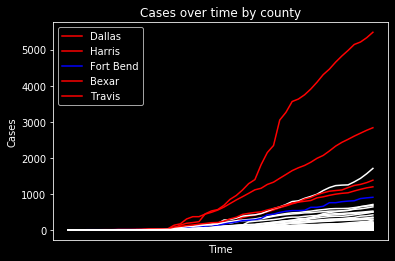

In [30]:
fig,ax = plt.subplots()
handles = []
for col in case_data_only.index:

    curr = case_data_only.T[col]

    if col in ["Harris","Dallas","Bexar","Travis"]:
        color = "red"
    elif col == "Fort Bend":
        color = "blue"
    else:
        color = "white"

    line, = ax.plot(case_data_only.T.index, curr, color=color)
    line.set_label(col)

    if col in ["Fort Bend","Harris","Dallas","Bexar","Travis"]:
        handles.append(line)

ax.legend(handles, ["Dallas","Harris","Fort Bend","Bexar","Travis"])
plt.xticks([])
plt.xlabel("Time")
plt.ylabel("Cases")
plt.title("Cases over time by county")
plt.show()

In [31]:
df.sort_values("Cases \n04-25", ascending=False).iloc[2].name

'Tarrant'

In [32]:
case_data_only.columns

Index(['Cases \n03-04', 'Cases \n03-05', 'Cases \n03-06', 'Cases \n03-09',
       'Cases \n03-10', 'Cases \n03-11', 'Cases \n03-12', 'Cases \n03-13',
       'Cases \n03-15', 'Cases \n03-16', 'Cases \n03-17', 'Cases \n03-18',
       'Cases \n03-19', 'Cases \n03-20', 'Cases \n03-21', 'Cases \n03-22',
       'Cases \n03-23', 'Cases \n03-24', 'Cases \n03-25', 'Cases \n03-26',
       'Cases \n03-27', 'Cases \n03-28', 'Cases \n03-29', 'Cases \n03-30',
       'Cases \n03-31', 'Cases \n04-01', 'Cases \n04-02', 'Cases \n04-03',
       'Cases \n04-04', 'Cases \n04-05', 'Cases \n04-06', 'Cases \n04-07',
       'Cases \n04-08', 'Cases \n04-09', 'Cases \n04-10', 'Cases \n04-11',
       'Cases \n04-12', 'Cases \n04-13', 'Cases \n04-14', 'Cases \n04-15',
       'Cases \n04-16', 'Cases \n04-17', 'Cases \n04-18', 'Cases \n04-19',
       'Cases \n04-20', 'Cases \n04-21', 'Cases \n04-22', 'Cases \n04-23',
       'Cases \n04-24', 'Cases \n04-25'],
      dtype='object')

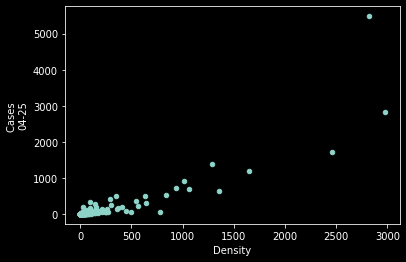

In [43]:
df[['Cases \n04-25',"Density"]].plot(kind="scatter", x="Density", y='Cases \n04-25')

In [44]:
df[['Cases \n04-25',"Density"]].corr()

,Cases \n04-25,Density
Cases \n04-25,1.000000,0.881215
Density,0.881215,1.000000


In [102]:

def colorselection(row):
    if row in ["Harris","Dallas","Bexar","Travis"]:
        color = "red"
    elif row == "Fort Bend":
        color = "blue"
    else:
        color = "white"

    return color

In [101]:
scatter_data[scatter_data["County Name"] == "Fort Bend"]

,County Name,y,x,color
78,Fort Bend,905,1015.537143,white


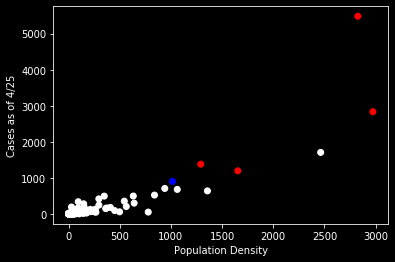

In [105]:
fig, ax2 = plt.subplots()
scatter_data = df[['Cases \n04-25',"Density"]]
scatter_data.columns = ["y","x"]
scatter_data.reset_index(inplace=True)
scatter_data["color"] = "white"
scatter_data["color"] = scatter_data["County Name"].apply(colorselection)
ax2.scatter(x=scatter_data.x, y=scatter_data.y, color=scatter_data.color)
plt.xlabel("Population Density")
plt.ylabel("Cases as of 4/25")
plt.show()

In [114]:
scatter_data[scatter_data.x > 850].to_markdown()

'|     | County Name   |    y |        x | color   |\n|----:|:--------------|-----:|---------:|:--------|\n|  14 | Bexar         | 1195 | 1653.64  | red     |\n|  42 | Collin        |  639 | 1356.6   | white   |\n|  56 | Dallas        | 2834 | 2972.93  | red     |\n|  60 | Denton        |  680 | 1061.96  | white   |\n|  70 | El Paso       |  706 |  940.144 | white   |\n|  78 | Fort Bend     |  905 | 1015.54  | blue    |\n| 100 | Harris        | 5482 | 2825.69  | red     |\n| 219 | Tarrant       | 1706 | 2462.79  | white   |\n| 226 | Travis        | 1379 | 1291.21  | red     |'

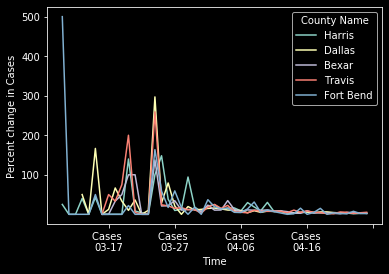

In [130]:
ax4 = (case_data_only.T[["Harris","Dallas","Bexar","Travis", "Fort Bend"]].pct_change()*100).plot()
ax4.set_xlabel("Time")
ax4.set_ylabel("Percent change in Cases")
ax4.set_yticks([100,200,300,400,500])

In [126]:
case_data_only.T[["Harris","Dallas","Bexar","Travis", "Fort Bend"]].pct_change().tail(5).to_markdown()

'|        |    Harris |    Dallas |     Bexar |    Travis |   Fort Bend |\n|:-------|----------:|----------:|----------:|----------:|------------:|\n| Cases  | 0.0319303 | 0.0345964 | 0.0137931 | 0.0595668 |   0.0204342 |\n| 04-21  |           |           |           |           |             |\n| Cases  | 0.0333534 | 0.035828  | 0.0495627 | 0.0502555 |   0.0112641 |\n| 04-22  |           |           |           |           |             |\n| Cases  | 0.0132219 | 0.0311299 | 0.0425926 | 0.0243309 |   0.0767327 |\n| 04-23  |           |           |           |           |             |\n| Cases  | 0.0228363 | 0.0298174 | 0.0364121 | 0.0387965 |   0.0218391 |\n| 04-24  |           |           |           |           |             |\n| Cases  | 0.0285178 | 0.0256967 | 0.0239931 | 0.0510671 |   0.0179978 |\n| 04-25  |           |           |           |           |             |'